In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import datetime as dt

In [34]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [35]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors = 'coerce')

df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True)

df['yrs_old'] = [i.year for i in df['date']] - df['yr_built']

df.drop(['date'], axis = 1, inplace = True)

In [36]:
df['view'] = df['view'].fillna(df['view'].mode()[0])

df['waterfront'] = df['waterfront'].fillna(df['waterfront'].mode()[0])

df['renovated'] = [0 if i == 0.0 else 1 for i in df['yr_renovated']]
df.drop(['yr_renovated'], axis = 1, inplace = True)

df['basement'] = [0 if i == 0.0 else 1 for i in df['sqft_basement']]
df.drop(['sqft_basement'], axis = 1, inplace = True)

In [37]:
df.drop(['yr_built'], axis = 1, inplace = True)

In [38]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
predictors = df.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2649.
Date:                Thu, 11 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:23:22   Log-Likelihood:            -2.9439e+05
No. Observations:               21597   AIC:                         5.888e+05
Df Residuals:                   21577   BIC:                         5.890e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.236e+06    2.9e+06      0.772      0.440   -3.44e+06    7.92e+06
id            -1.326e-06   4.83e-07     -2.747      0.006   -2.27e-06    -3.8e-07
bedrooms       -3.62e+04   1900.661    -19.046      0.000   -3.99e+04   -3.25e+04
bathrooms      4.397e+04   3264.646     13.470      0.000    3.76e+04    5.04e+04
sqft_living     152.0977      5.921     25.688      0.000     140.492     163.703
sqft_lot          0.1195      0.048      2.489      0.013       0.025       0.214
floors         8078.3666   3599.349      2.244      0.025    1023.376    1.51e+04
waterfront     6.219e+05   1.81e+04     34.305      0.000    5.86e+05    6.57e+05
view           5.355e+04   2124.996     25.202      0.000    4.94e+04    5.77e+04
condition      2.479e+04   2325.972     10.657      0.000    2.02e+04    2.93e+04
grade          9.758e+04   2166.707     45.036      0.000    9.33e+04    1.02e+05
sqft_above       27.8386      6.476      4.299      0.000      15.145      40.533
zipcode        -587.3493     33.042    -17.776      0.000    -652.114    -522.585
lat            5.983e+05   1.07e+04     55.714      0.000    5.77e+05    6.19e+05
long          -2.136e+05   1.32e+04    -16.178      0.000   -2.39e+05   -1.88e+05
sqft_living15    20.9904      3.450      6.084      0.000      14.228      27.752
sqft_lot15       -0.4000      0.074     -5.439      0.000      -0.544      -0.256
yrs_old        2755.2606     69.491     39.649      0.000    2619.053    2891.469
renovated      8081.3835   3386.889      2.386      0.017    1442.831    1.47e+04
basement      -3147.0069   4921.096     -0.639      0.523   -1.28e+04    6498.705
==============================================================================
Omnibus:                    18394.810   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1862033.410
Skew:                           3.576   Prob(JB):                         0.00
Kurtosis:                      47.923   Cond. No.                     1.14e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
df.drop(['basement'], axis = 1, inplace = True)

In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
predictors = df.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2797.
Date:                Thu, 11 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:23:24   Log-Likelihood:            -2.9439e+05
No. Observations:               21597   AIC:                         5.888e+05
Df Residuals:                   21578   BIC:                         5.890e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.429e+06   2.88e+06      0.843      0.399   -3.22e+06    8.08e+06
id            -1.329e-06   4.83e-07     -2.752      0.006   -2.28e-06   -3.82e-07
bedrooms      -3.619e+04   1900.612    -19.043      0.000   -3.99e+04   -3.25e+04
bathrooms      4.374e+04   3243.424     13.485      0.000    3.74e+04    5.01e+04
sqft_living     149.5614      4.396     34.021      0.000     140.945     158.178
sqft_lot          0.1192      0.048      2.483      0.013       0.025       0.213
floors         8116.7659   3598.799      2.255      0.024    1062.854    1.52e+04
waterfront     6.221e+05   1.81e+04     34.317      0.000    5.87e+05    6.58e+05
view           5.361e+04   2123.184     25.250      0.000    4.94e+04    5.78e+04
condition      2.485e+04   2323.790     10.694      0.000    2.03e+04    2.94e+04
grade          9.748e+04   2160.506     45.117      0.000    9.32e+04    1.02e+05
sqft_above       30.9008      4.360      7.087      0.000      22.354      39.447
zipcode        -588.4838     32.994    -17.836      0.000    -653.154    -523.814
lat            5.981e+05   1.07e+04     55.723      0.000    5.77e+05    6.19e+05
long           -2.13e+05   1.32e+04    -16.173      0.000   -2.39e+05   -1.87e+05
sqft_living15    20.9394      3.449      6.071      0.000      14.179      27.700
sqft_lot15       -0.3998      0.074     -5.437      0.000      -0.544      -0.256
yrs_old        2754.3496     69.476     39.645      0.000    2618.172    2890.527
renovated      8089.0760   3386.821      2.388      0.017    1450.656    1.47e+04
==============================================================================
Omnibus:                    18407.278   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1866998.200
Skew:                           3.579   Prob(JB):                         0.00
Kurtosis:                      47.983   Cond. No.                     1.14e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

for i in range(len(df.columns[:-1])):
    v = vif(np.matrix(df[:-1]), i)
    print('Variance inflation factor for {}: {}'.format(df.columns[i], round(v, 2)))

Variance inflation factor for id: 3.63
Variance inflation factor for price: 3.33
Variance inflation factor for bedrooms: 1.67
Variance inflation factor for bathrooms: 3.34
Variance inflation factor for sqft_living: 9.05
Variance inflation factor for sqft_lot: 2.1
Variance inflation factor for floors: 1.96
Variance inflation factor for waterfront: 1.24
Variance inflation factor for view: 1.43
Variance inflation factor for condition: 1.2
Variance inflation factor for grade: 3.73
Variance inflation factor for sqft_above: 6.82
Variance inflation factor for zipcode: 0.49
Variance inflation factor for lat: 1.35
Variance inflation factor for long: 1.84
Variance inflation factor for sqft_living15: 2.89
Variance inflation factor for sqft_lot15: 2.14
Variance inflation factor for yrs_old: 2.17


In [42]:
y = df[['price']]
X = df.drop(['price'], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 40645778860.59171
Test Mean Squarred Error: 39998646595.87494


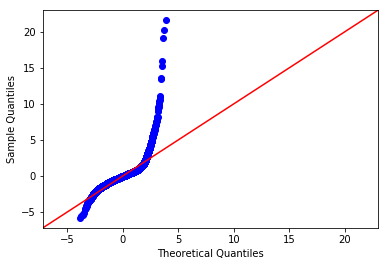

In [43]:
resid = model.resid

fig = sm.graphics.qqplot(resid, dist = stats.norm, line = '45', fit = True)

In [44]:
df = df[(df['price'] >= 0) & (df['price'] <= 1000000)]

df = df[(df['bedrooms'] >= 0) & (df['bedrooms'] <= 10)]

df = df[(df['bathrooms'] >= 0) & (df['bathrooms'] <= 5)]

In [45]:
df.drop(['id'], axis = 1, inplace = True)

In [46]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
predictors = df.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     2645.
Date:                Thu, 11 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:23:37   Log-Likelihood:            -2.6209e+05
No. Observations:               20130   AIC:                         5.242e+05
Df Residuals:                   20112   BIC:                         5.244e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9.639e+06   1.62e+06     -5.937      0.000   -1.28e+07   -6.46e+06
bedrooms      -9731.5175   1150.360     -8.460      0.000    -1.2e+04   -7476.718
bathrooms      2.547e+04   1900.565     13.403      0.000    2.17e+04    2.92e+04
sqft_living      66.7064      2.708     24.634      0.000      61.399      72.014
sqft_lot          0.2357      0.027      8.605      0.000       0.182       0.289
floors         3.231e+04   2075.385     15.569      0.000    2.82e+04    3.64e+04
waterfront     1.459e+05   1.62e+04      9.018      0.000    1.14e+05    1.78e+05
view           2.773e+04   1370.031     20.241      0.000     2.5e+04    3.04e+04
condition      2.417e+04   1312.280     18.421      0.000    2.16e+04    2.67e+04
grade          7.009e+04   1263.174     55.483      0.000    6.76e+04    7.26e+04
sqft_above        2.5998      2.648      0.982      0.326      -2.590       7.790
zipcode        -210.9879     18.619    -11.332      0.000    -247.482    -174.493
lat            5.366e+05   5923.598     90.592      0.000    5.25e+05    5.48e+05
long          -3.514e+04   7323.105     -4.799      0.000   -4.95e+04   -2.08e+04
sqft_living15    46.2229      2.129     21.715      0.000      42.051      50.395
sqft_lot15       -0.1322      0.042     -3.159      0.002      -0.214      -0.050
yrs_old        1832.8686     40.374     45.398      0.000    1753.733    1912.004
renovated      3072.7299   1916.568      1.603      0.109    -683.901    6829.361
==============================================================================
Omnibus:                     1143.985   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1776.006
Skew:                           0.483   Prob(JB):                         0.00
Kurtosis:                       4.089   Cond. No.                     2.12e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

dfi = df.drop(['price'], axis = 1)

for i in range(len(dfi.columns[:-1])):
    v = vif(np.matrix(dfi[:-1]), i)
    print('Variance inflation factor for {}: {}'.format(dfi.columns[i], round(v, 2)))

Variance inflation factor for bedrooms: 26.23
Variance inflation factor for bathrooms: 28.26
Variance inflation factor for sqft_living: 53.5
Variance inflation factor for sqft_lot: 2.28
Variance inflation factor for floors: 17.34
Variance inflation factor for waterfront: 1.1
Variance inflation factor for view: 1.28
Variance inflation factor for condition: 34.22
Variance inflation factor for grade: 153.54
Variance inflation factor for sqft_above: 38.89
Variance inflation factor for zipcode: 1540372.53
Variance inflation factor for lat: 133554.21
Variance inflation factor for long: 1339769.72
Variance inflation factor for sqft_living15: 29.75
Variance inflation factor for sqft_lot15: 2.5
Variance inflation factor for yrs_old: 6.93


In [28]:
y = df[['price']]
X = df.drop(['price'], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 13803650817.772173
Test Mean Squarred Error: 13575804300.568426


In [29]:
resid = model.resid

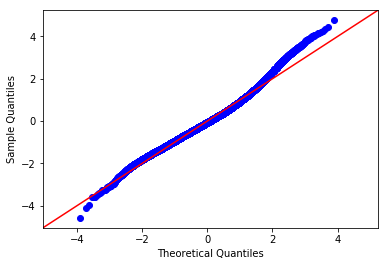

In [30]:
fig = sm.graphics.qqplot(resid, dist = stats.norm, line = '45', fit = True)

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

In [32]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-13929880776.757069
-13891462348.070932
-13824517999.749355
